# Random Forest and Gradient Boosted Trees

This is a project that I did for the UW Machine Learning program showing some of the benefits of random forests and gradient boosted trees by using a classification problem on a simple, overlapping, moon-shaped dataset. By comparing the model performance of various classifiers, ranging from simple linear model to ensemble tree-based models, the power of ensemble models is demonstrated. It also demonstrates the benefits of using cross validation for parameter tuning.  

Please note that some of this code (i.e. the helper function) was provided as part of the project. 

# Table of Contents

### 1. Basic Setup (Libraries, helper function, pull in and plot data)
### 2. Logistic Regression 
### 3. Decision Tree
### 4. Random Forest
### 5. Gradient Boosted Tree
### 6. Conclusion and Model Comparison

## 1. Basic Setup (libraries, helper function, pull in and plot data)

In [1]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from random import choices

# make this notebook's output stable across runs
np.random.seed(0)

In [2]:
# helper function 
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

### Synthetic Moon dataset
I classify a moon shaped synthetic dataset with two features (_x1_ and _x2_) and two classes (0 or 1) with some added noise. 

In [3]:
# load the moon train and test data from CSV files
train = pd.read_csv("moon_train.csv")
test = pd.read_csv("moon_test.csv")

train_x = train.iloc[:,0:2]
train_y = train.iloc[:,2]

test_x = test.iloc[:,0:2]
test_y = test.iloc[:,2]

print("Number of train data: {}".format(len(train_y)))
print("Number of test data: {}".format(len(test_y)))

Number of train data: 3000
Number of test data: 1000


Text(0, 0.5, 'x2')

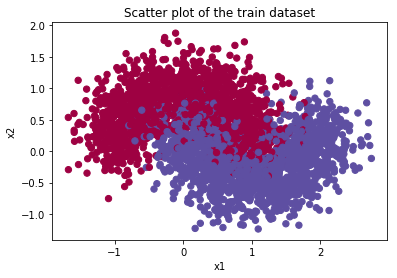

In [4]:
# plot the train dataset
plt.scatter(train_x.x1, train_x.x2, s=40, c=train_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the train dataset')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

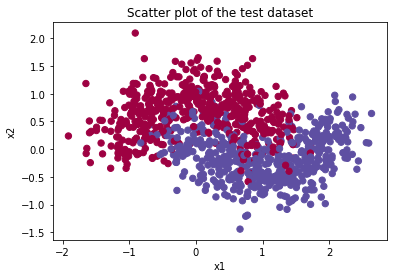

In [5]:
# plot the test dataset
plt.scatter(test_x.x1, test_x.x2, s=40, c=test_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the test dataset')
plt.xlabel('x1')
plt.ylabel('x2')

## 2. Logistic Regression
First, I fit a linear regression classifier to separate the two classes in the moon dataset. Note that since logistic regression is a linear model, the decision boundary is a linear in the input space.

In [6]:
# Baseline 1: logistic regression classifier
parameters = {
    "penalty": ["l1", "l2"], 
    "C": [0.01, 0.1, 1]
}

lr_grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), parameters, cv=3)
lr_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(lr_grid.best_score_))
print("The best hyper parameter setting is {}".format(lr_grid.best_params_))

The best score is 0.846
The best hyper parameter setting is {'C': 1, 'penalty': 'l1'}


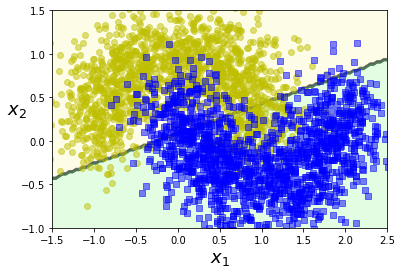

In [7]:
# plot the decision boundary
plot_decision_boundary(lr_grid, train_x.values, train_y.values)

In [8]:
# make prediction and evaluate the model performance on test data
test_z = lr_grid.predict(test_x)
test_z_prob = lr_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.84
model ROC AUC: 0.9260360000000001


## 3. Decision Tree Classifier
Then, I fit a decision tree classifier to separate the two classes in the moon dataset. Note that decision boundary is no longer linear.

In [9]:
# Baseline 2: Decision Tree classifier
parameters = {
    "max_depth": [2, 4], 
    "min_samples_split": [0.05, 0.1, 0.2]
}

dtc = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc, parameters, cv=3)
dtc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(dtc_grid.best_score_))
print("The best hyper parameter setting is {}".format(dtc_grid.best_params_))

The best score is 0.8853333333333333
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.05}


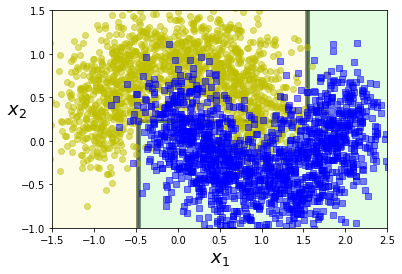

In [10]:
# plot the decision boundary
plot_decision_boundary(dtc_grid, train_x.values, train_y.values)

In [11]:
# make prediction and evaluate the model performance on test data
test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.892
model ROC AUC: 0.8990000000000001


## 4. Random Forest

### Implement a simplified version of Random Forest Classifier

Here I implemented a random forest classifier. 
- Used bootstrapping to generate different ensemble datasets, I trained a separate classifier to each dataset.
- Apply grid search with cross-validation to learn and fine-tune each decision tree classifier.
- Implement two predict functions: one outputs the probabilities while the other outputs the predicted class.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default). 

In [12]:
# Fine-tune Random Forest classifier using grid search with cross-validation (GridSearchCV).
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

rfc = RandomForestClassifier(n_estimators=100)
rfc_grid = GridSearchCV(cv=5, estimator=rfc, param_grid=parameters) # TODO: use grid search with cross-validation to fine-tune the model
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.9063333333333333
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 0.01}


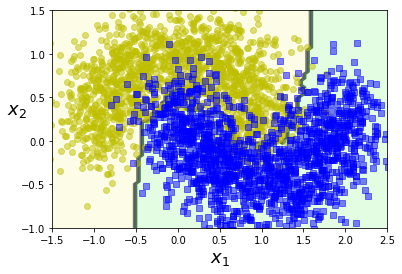

In [13]:
# plot the decision boundary
plot_decision_boundary(rfc_grid, train_x.values, train_y.values)

Notice that the decision boundary is no longer orthogonal to the x and y axises and is able to better separate the two classes in the moon dataset.

Now I use the fine-tuned model to make predictions on the test dataset and evaluate it's performance in terms of accuracy and ROC AUC. 

In [14]:
# Make prediction and evaluate the model performance on test data
test_z = rfc_grid.predict(test_x) 
test_z_prob = rfc_grid.predict_proba(test_x) # Make prediction of probabilities 

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.903


In [15]:
test_z_prob = test_z_prob[:,1]

print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model ROC AUC: 0.961514


## 5. Gradient Boosted Trees

Gradient Boosted Trees is a generalization of boosting to arbitrary differentiable loss functions, which can be used for both regression and classification problems. At a high level, gradient boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. Gradient Boosted Trees, which is a special case of gradient boosting, uses regression trees as the base predictors and builds an additive model in a forward stage-wise fashion. In each stage, regression trees are fit on the negative gradient of the loss function used in a classification or a regression problem. 

Gradient boosting introduces a new hyperparameter *learning_rate*, which scales the contribution of each tree. If you set it to a low values, such as 0.1, you will need more trees in the ensemble to fit the training data, but the predictions will usually generalize better. This is a regularization technique called shrinkage. 

In [16]:
# Fine-tune Gradient Boosted Trees using grid search with cross-validation (GridSearchCV).
parameters = {
    # Specify the parameters
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.03, 0.05, 0.075, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.7, 0.9, 1],
    'max_depth': [3, 4, 5, 6, 7]
}

gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(cv=5, estimator=gbc, param_grid=parameters) # Use grid search with cross-validation to fine-tune the model
gbc_grid.fit(train_x, train_y)

# Summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9113333333333333
The best hyper parameter setting is {'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 7, 'subsample': 0.5}


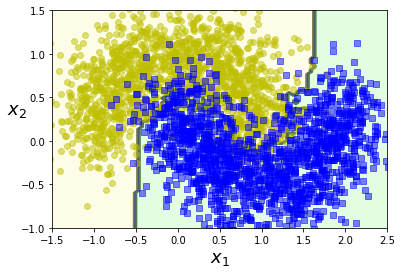

In [17]:
# plot the decision boundary for decision tree classifier
plot_decision_boundary(gbc_grid, train_x.values, train_y.values)

Now I use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [18]:
# Make prediction and evaluate the model performance on test data
test_z = gbc_grid.predict(test_x)  
test_z_prob = gbc_grid.predict_proba(test_x) 

test_z_prob = test_z_prob[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.9
model ROC AUC: 0.961444


## 6. Conclusion and Model Comparison

By comparing the model performance as well as the decision boundaries learned from different classifiers on the same dataset, we clearly see Random Forest and Gradient Boosted Trees are capable of modeling more complex patterns in the data as compared to linear models and decision trees, leading to superior performance on the test dataset.

### Conceptual Overview

Random forests is a way to fit lots of different trees to the data and then put them together to get a model that is more robust than a basic decision tree. It works by sampling the data with replacement so that it is fitting on a different dataset each time it builds a decision tree. 

## Results 
### Logistic Regression: 
Model accuracy: 0.840

Model ROC AUC: 0.926

### Decision Tree
Model accuracy: 0.892

Model ROC AUC: 0.899

### Random Forest
Model accuracy: 0.903

Model ROC AUC: 0.962

### Gradient Boosted Tree
Model accuracy: 0.900

Model ROC AUC: 0.961

The Random Forest and the Gradient Boosted Tree models performed substantially better than the Logistic Regression and Decision Tree models when looking at model accuracy and ROC AUC. The Random Forest and Gradient Boosted Tree models performed comparably to each other. Visually they also do a better job of fitting the data. 